<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml08_svm_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR, SVR
# 분류: LinearSVC, SVC
# 회귀: LinearSVR, SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [5]:
# 가상의 훈련 셋
np.random.seed(42)
m = 100  # 샘플 개수(row 개수)
X = 2 * np.random.rand(m, 1) - 1  # -1 <= X < 1 범위의 숫자들을 갖는 (100, 1) 모양의 2d array
y = 0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1) / 10
X.shape, y.shape

((100, 1), (100, 1))

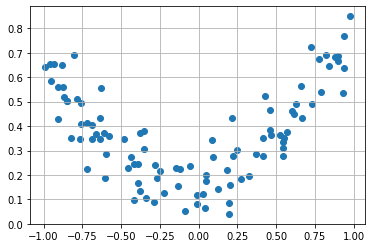

In [6]:
# 샘플 데이터을 시각화
plt.scatter(X, y)
plt.grid()

In [19]:
# PolynomilaFeatures + StandarScaler + LinearSVR
model_1 = Pipeline([
        ('poly_feat', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('clf', LinearSVR(random_state=42, max_iter=10_000))
])  # 모델 생성

model_1.fit(X, y.ravel())  # 모델 훈련

Pipeline(memory=None,
         steps=[('poly_feat',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=10000, random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [17]:
# PipeLine 객체가 가지고 있는 변환기(transformer), 추정기(estimator)를 사용할 때:
model_1['clf'].intercept_, model_1['clf'].coef_

(array([0.36795816]), array([0.03914005, 0.16912983, 0.00847348]))

In [14]:
def plot_regression(X, y, model):
    # 샘플(훈련 셋) 시각화
    plt.scatter(X, y)

    # regression 결과 시각화
    X_new = np.linspace(start=-1, stop=1, num=100).reshape((100, 1))  # (100, 1) 모양의 2d array
    y_new = model.predict(X_new)
    plt.plot(X_new, y_new, 'r-')
    plt.grid()

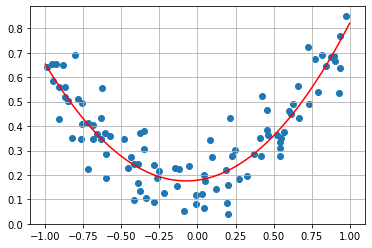

In [20]:
plot_regression(X, y, model_1)

In [21]:
# 회귀 모델 평가
from sklearn.metrics import mean_squared_error

y_pred = model_1.predict(X)
mse_1 = mean_squared_error(y.ravel(), y_pred)
np.sqrt(mse_1)  # RMSE

0.08818953131571805

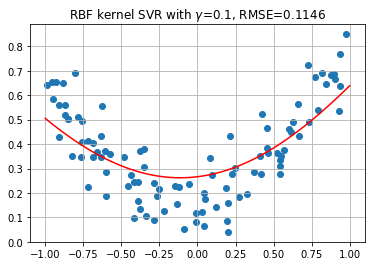

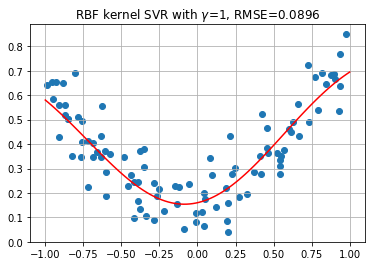

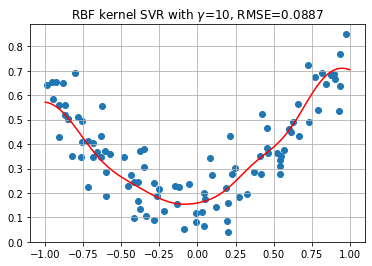

In [24]:
# SVR, kernerl='rbf', gamma=[0.1, 1, 10] -> 회귀 결과를 시각화, RMSE 출력
for g in [0.1, 1, 10]:
    svm_reg = SVR(kernel='rbf', gamma=g)  # 모델 생성
    svm_reg.fit(X, y.ravel())  # 모델 훈련
    y_pred = svm_reg.predict(X)  # 예측
    mse = mean_squared_error(y, y_pred)  # 평가
    rmse = np.sqrt(mse)
    plot_regression(X, y, svm_reg)
    plt.title(f'RBF kernel SVR with $\gamma$={g}, RMSE={round(rmse, 4)}')
    plt.show()